In [3]:
import pandas as pd

In [4]:
tydenni = pd.read_csv("data/tydenni_statistiky.csv")
df = pd.read_csv("data/souhrnne_vysledky.csv")

In [5]:
tydenni['týden_od'] = pd.to_datetime(tydenni['týden_od'], dayfirst=True)
tydenni['týden_od'] = pd.to_datetime(tydenni['týden_od'], dayfirst=True)

In [6]:
tydenni['týden_od'].max()

Timestamp('2024-09-12 00:00:00')

In [7]:
pomesicich = pd.DataFrame(tydenni.groupby([pd.Grouper(key='týden_od', freq='ME'), 'film'])['víkend_diváci'].sum() + tydenni.groupby([pd.Grouper(key='týden_od', freq='ME'), 'film'])['týden_diváci'].sum()).rename(columns={0: 'celkem'})
pomesicich

celkem
týden_od   film                                  
2009-12-31 2 Bobule                        2828.0
           2012                            5949.0
           3 sezóny v pekle                8505.0
           Alvin a Chipmunkové 2          18654.0
           Arthur a Maltazardova pomsta    1626.0
...                                           ...
2024-09-30 V hlavě 2                      85106.0
           Vetřelec: Romulus              31757.0
           Vlny                          246911.0
           Zahradníkův rok                 2986.0
           Zápisník alkoholičky           34436.0

[5604 rows x 1 columns]

In [8]:
most_visited_films = pomesicich.groupby('týden_od')['celkem'].idxmax()
most_visited_films.tail(24)

týden_od
2022-10-31                    (2022-10-31 00:00:00, Black Adam)
2022-11-30    (2022-11-30 00:00:00, Black Panther: Wakanda n...
2022-12-31      (2022-12-31 00:00:00, Avatar: The Way of Water)
2023-01-31      (2023-01-31 00:00:00, Avatar: The Way of Water)
2023-02-28                        (2023-02-28 00:00:00, Ostrov)
2023-03-31         (2023-03-31 00:00:00, John Wick: Kapitola 4)
2023-04-30    (2023-04-30 00:00:00, Super Mario Bros. ve filmu)
2023-05-31     (2023-05-31 00:00:00, Strážci Galaxie: Volume 3)
2023-06-30    (2023-06-30 00:00:00, Spider-Man: Napříč paral...
2023-07-31                        (2023-07-31 00:00:00, Barbie)
2023-08-31       (2023-08-31 00:00:00, ONEMANSHOW - The Movie )
2023-09-30    (2023-09-30 00:00:00, Tlapková patrola ve velk...
2023-10-31    (2023-10-31 00:00:00, Tlapková patrola ve velk...
2023-11-30           (2023-11-30 00:00:00, Pět nocí u Freddyho)
2023-12-31                         (2023-12-31 00:00:00, Wonka)
2024-01-31          (2024-01-31

<Axes: xlabel='týden_od'>

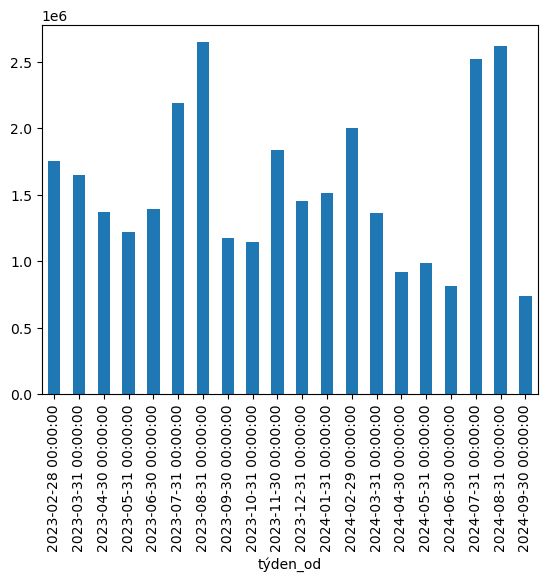

In [9]:
pd.Series(tydenni.groupby(pd.Grouper(key='týden_od', freq='ME'))['týden_diváci'].sum() + tydenni.groupby(pd.Grouper(key='týden_od', freq='ME'))['víkend_diváci'].sum()).tail(20).plot.bar()

<Axes: xlabel='týden_od'>

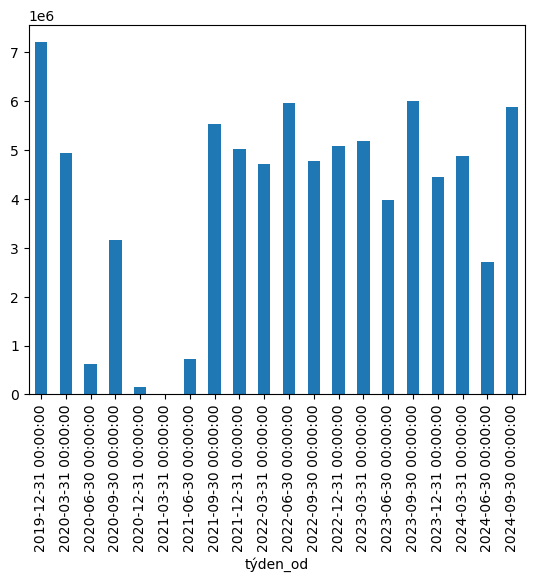

In [10]:
pd.Series(tydenni.groupby(pd.Grouper(key='týden_od', freq='QE'))['týden_diváci'].sum() + tydenni.groupby(pd.Grouper(key='týden_od', freq='QE'))['víkend_diváci'].sum()).tail(20).plot.bar()

In [11]:
tydenni.groupby('film')['celkem_diváci'].max().nlargest(10)

film
Bohemian Rhapsody           1670523.0
Avatar: The Way of Water    1463844.0
Ženy v běhu                 1328037.0
Avatar 3D                   1312588.0
Avatar                      1308541.0
Avatar                      1298320.0
Anděl Páně 2                1148285.0
Ženy v pokušení             1043570.0
Avengers: Endgame            910729.0
Ledové království II         868870.0
Name: celkem_diváci, dtype: float64

In [12]:
tydenni[tydenni['poč_týd'] == 7].groupby('film')['celkem_diváci'].max().nlargest(50)

film
Avatar: The Way of Water                       1237322.0
Ženy v běhu                                    1031958.0
Anděl Páně 2                                    963201.0
Avengers: Endgame                               887957.0
Avatar                                          866854.0
Bohemian Rhapsody                               836362.0
V hlavě 2                                       767179.0
Ledové království II                            754802.0
Ženy v pokušení                                 697512.0
Barbie                                          664778.0
Harry Potter a relikvie smrti - 2.část          655776.0
Mimoni                                          654559.0
Harry Potter a relikvie smrti - 1.část          643967.0
Hobit: Bitva pěti armád                         639246.0
Muži v naději                                   635518.0
Kajínek                                         625128.0
Hobit: Neočekávaná cesta                        596240.0
Avengers: Infinity War    

<Axes: xlabel='týden_od'>

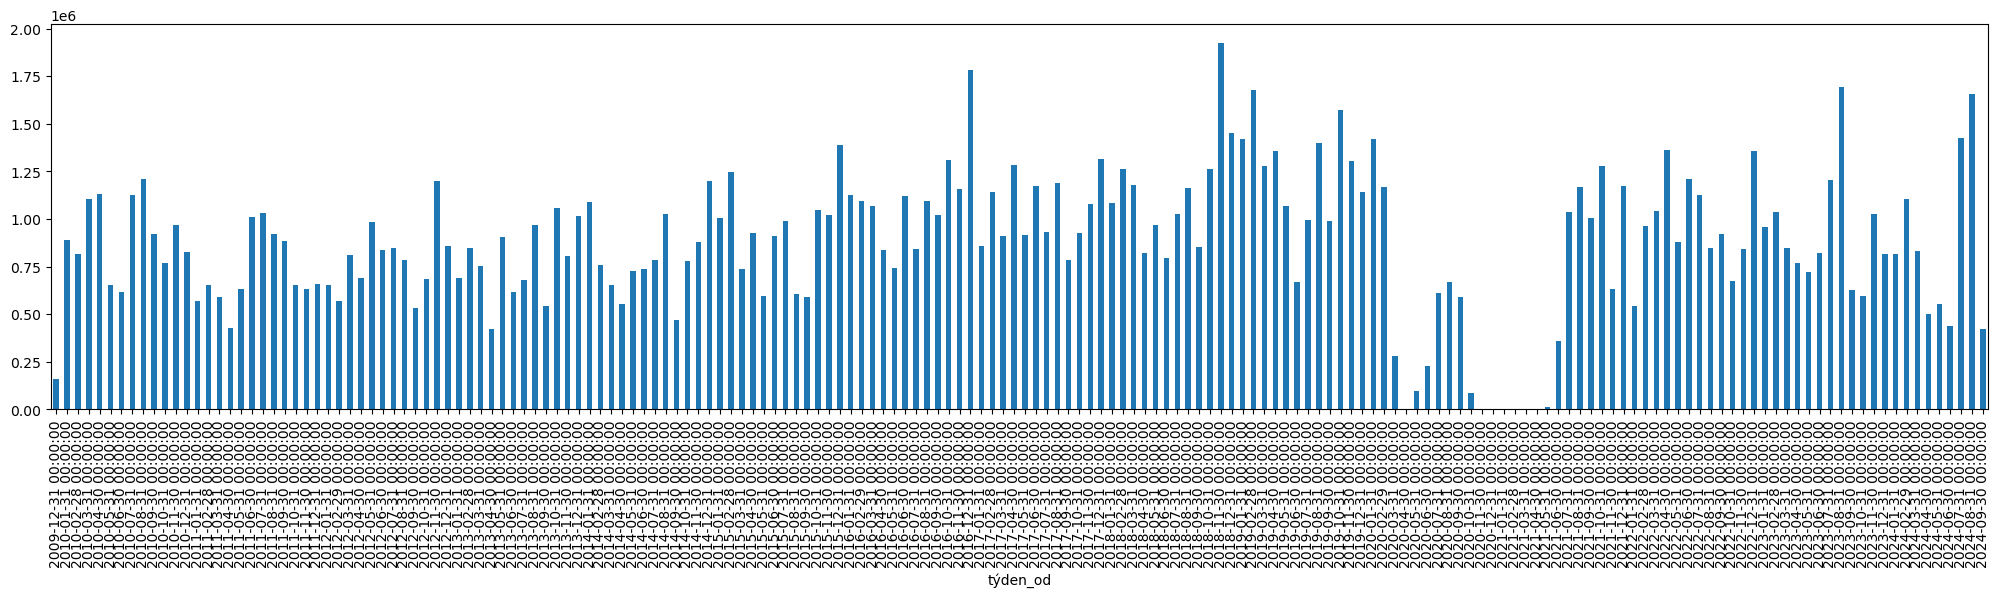

In [13]:
tydenni.groupby(pd.Grouper(key='týden_od', freq='ME'))['týden_diváci'].sum().plot.bar(figsize=(25,5))

In [14]:
rocni_top20 = tydenni.groupby(pd.Grouper(key='týden_od', freq='YE'))['týden_diváci'].sum()
rocni_top20.index = rocni_top20.index.astype(str).str[:4]
rocni_top20

týden_od
2009      161925.0
2010    11034385.0
2011     8662073.0
2012     9453212.0
2013     9309885.0
2014     9658538.0
2015    11063186.0
2016    13194094.0
2017    12511907.0
2018    13788874.0
2019    14869952.0
2020     5155022.0
2021     6662544.0
2022    11769465.0
2023    11123881.0
2024     7751860.0
Name: týden_diváci, dtype: float64

In [15]:
rocni = df.groupby('rok')['divactvo'].sum()
rocni.index = rocni.index.astype(str)

In [16]:
rocni_top20 / rocni

2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009    0.012986
2010    0.815136
2011    0.802805
2012    0.845407
2013    0.841948
2014    0.835616
2015    0.853766
2016    0.844588
2017    0.821345
2018    0.843641
2019    0.811702
2020    0.807370
2021    0.932919
2022    0.872089
2023    0.834063
2024    0.890101
dtype: float64

In [17]:
tydenni.groupby(pd.Grouper(key='týden_od', freq='YE'))['týden_diváci'].sum()

týden_od
2009-12-31      161925.0
2010-12-31    11034385.0
2011-12-31     8662073.0
2012-12-31     9453212.0
2013-12-31     9309885.0
2014-12-31     9658538.0
2015-12-31    11063186.0
2016-12-31    13194094.0
2017-12-31    12511907.0
2018-12-31    13788874.0
2019-12-31    14869952.0
2020-12-31     5155022.0
2021-12-31     6662544.0
2022-12-31    11769465.0
2023-12-31    11123881.0
2024-12-31     7751860.0
Name: týden_diváci, dtype: float64

In [18]:
tydenni

,celkem_diváci,celkem_tržby,distributor,film,min_poř,poč_kin,poč_týd,poř,prod,rok,týden,týden_diváci,týden_tržby,víkend_diváci,víkend_tržby,změna_v_%,týden_od,víkend_od,datum,formát
0,157233.0,20751339.0,Bontonfilm,Život je život,1.0,73.0,3.0,1,CZE,2015,23,43378.0,5887758.0,11718.0,1582002.0,-0.658975,2015-05-28,4.06.2015,NaN,NaN
1,118412.0,17542415.0,Freeman Entertainment,Šílený Max: Zběsilá cesta,2.0,52.0,4.0,2,AUS,2015,23,19706.0,2945778.0,6396.0,952774.0,-0.547767,2015-05-28,4.06.2015,NaN,NaN
2,9978.0,1121873.0,Bohemia Motion Pictures,Sedmero krkavců,13.0,139.0,1.0,3,CZE,2015,23,2417.0,191115.0,7561.0,930758.0,3.947814,2015-05-28,4.06.2015,NaN,NaN
3,6278.0,857545.0,Falcon,Insidious 3: Počátek,NaN,59.0,1.0,4,USA,2015,23,NaN,NaN,6278.0,857545.0,NaN,2015-05-28,4.06.2015,NaN,NaN
4,5892.0,790572.0,CinemArt,Špión,27.0,86.0,1.0,5,USA,2015,23,268.0,36233.0,5624.0,754339.0,19.819115,2015-05-28,4.06.2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317,35124.0,4373169.0,Falcon,Kapitán Phillips,19.0,12.0,6.0,16,USA,2013,52,1606.0,207532.0,824.0,110318.0,-0.209298,2013-12-19,26.12.2013,NaN,NaN
15318,16002.0,1903347.0,Bontonfilm,Pozdravy ze spermabanky,29.0,13.0,5.0,17,USA,2013,52,1031.0,144627.0,790.0,109653.0,0.054021,2013-12-19,26.12.2013,NaN,NaN
15319,4412.0,581561.0,CinemArt,Vše je ztraceno,22.0,16.0,3.0,18,USA,2013,52,1293.0,174255.0,834.0,107193.0,-0.203630,2013-12-19,26.12.2013,NaN,NaN
15320,632.0,104603.0,CinemArt,47 róninů,NaN,13.0,-1.0,19,USA,2013,52,NaN,NaN,632.0,104603.0,NaN,2013-12-19,26.12.2013,NaN,NaN


In [19]:
df

,rok,mesic,predstaveni,divactvo,ciste_trzby,prumerne_vstupne
0,2000,1,16184.0,688131.0,45494892.0,66.113708
1,2000,2,15774.0,888290.0,60084053.0,67.640132
2,2000,3,17508.0,946705.0,61743112.0,65.218956
3,2000,4,16755.0,742518.0,46847625.0,63.092915
4,2000,5,16154.0,646617.0,43016124.0,66.524889
...,...,...,...,...,...,...
295,2024,8,48730.0,1756385.0,310263777.0,176.649070
296,2024,9,NaN,NaN,NaN,NaN
297,2024,10,NaN,NaN,NaN,NaN
298,2024,11,NaN,NaN,NaN,NaN


In [20]:
tydenni.groupby(pd.Grouper(key='týden_od', freq='ME'))['týden_diváci'].sum().nlargest(20)

týden_od
2018-11-30    1925052.0
2016-12-31    1780658.0
2023-08-31    1692076.0
2019-02-28    1679421.0
2024-08-31    1655695.0
2019-10-31    1572419.0
2018-12-31    1452840.0
2024-07-31    1427081.0
2020-01-31    1421277.0
2019-01-31    1419102.0
2019-08-31    1400415.0
2015-12-31    1386507.0
2022-04-30    1364587.0
2019-04-30    1357316.0
2022-12-31    1355959.0
2017-12-31    1317483.0
2016-10-31    1310485.0
2019-11-30    1302089.0
2017-04-30    1284758.0
2019-03-31    1279355.0
Name: týden_diváci, dtype: float64

In [21]:
tydenni.groupby(pd.Grouper(key='týden_od', freq='ME'))['týden_diváci'].sum().tail(24)

týden_od
2022-10-31     676682.0
2022-11-30     839797.0
2022-12-31    1355959.0
2023-01-31     958638.0
2023-02-28    1038746.0
2023-03-31     847004.0
2023-04-30     770858.0
2023-05-31     721720.0
2023-06-30     821867.0
2023-07-31    1203929.0
2023-08-31    1692076.0
2023-09-30     625506.0
2023-10-31     597589.0
2023-11-30    1028765.0
2023-12-31     817183.0
2024-01-31     815666.0
2024-02-29    1105969.0
2024-03-31     830546.0
2024-04-30     501898.0
2024-05-31     555662.0
2024-06-30     437579.0
2024-07-31    1427081.0
2024-08-31    1655695.0
2024-09-30     421764.0
Name: týden_diváci, dtype: float64

In [22]:
tydenni.columns

Index(['celkem_diváci', 'celkem_tržby', 'distributor', 'film', 'min_poř',
       'poč_kin', 'poč_týd', 'poř', 'prod', 'rok', 'týden', 'týden_diváci',
       'týden_tržby', 'víkend_diváci', 'víkend_tržby', 'změna_v_%', 'týden_od',
       'víkend_od', 'datum', 'formát'],
      dtype='object')

In [23]:
tydenni.groupby('film')['poč_kin'].max().nlargest(10)

film
ONEMANSHOW - The Movie            280.0
Vlny                              265.0
Avatar: The Way of Water          254.0
Indiana Jones a nástroj osudu     252.0
Jan Žižka                         244.0
Zápisník alkoholičky              242.0
Poslední závod                    240.0
Betlémské světlo                  237.0
Karel                             235.0
Tajemství staré bambitky 2        233.0
Name: poč_kin, dtype: float64

In [24]:
tydenni.groupby(pd.Grouper(key='týden_od', freq='ME'))['týden_diváci'].sum().tail()

týden_od
2024-05-31     555662.0
2024-06-30     437579.0
2024-07-31    1427081.0
2024-08-31    1655695.0
2024-09-30     421764.0
Name: týden_diváci, dtype: float64

In [25]:
df.dropna().sort_values(by="divactvo",ascending=False).head(15)

,rok,mesic,predstaveni,divactvo,ciste_trzby,prumerne_vstupne
239,2019,12,45441.0,1999319.0,272816373.0,136.454649
203,2016,12,40628.0,1960501.0,237644159.0,121.216036
229,2019,2,42622.0,1957276.0,290453053.0,148.396574
226,2018,11,43764.0,1908609.0,282383540.0,147.952535
227,2018,12,46147.0,1897679.0,250315849.0,131.906318
283,2023,8,43667.0,1887930.0,328685071.0,174.098124
230,2019,3,45081.0,1797295.0,263882269.0,146.821901
295,2024,8,48730.0,1756385.0,310263777.0,176.649070
238,2019,11,42760.0,1702514.0,252857595.0,148.520127
267,2022,4,42830.0,1669256.0,265880098.0,159.280600


In [26]:
df.dropna().tail(24)

,rok,mesic,predstaveni,divactvo,ciste_trzby,prumerne_vstupne
272,2022,9,42119.0,965998.0,139117943.0,144.014732
273,2022,10,44185.0,919392.0,147667868.0,160.614698
274,2022,11,40579.0,1022608.0,162525592.0,158.932447
275,2022,12,39591.0,1422808.0,244167731.0,171.609754
276,2023,1,37199.0,1157725.0,205788180.0,177.752212
277,2023,2,38716.0,1173722.0,201709905.0,171.854924
278,2023,3,42640.0,891676.0,151167574.0,169.531953
279,2023,4,43956.0,1072567.0,178613556.0,166.529043
280,2023,5,41593.0,859181.0,151102780.0,175.868391
281,2023,6,41251.0,871043.0,135276058.0,155.303536


In [27]:
df[df['mesic'] <= 7].groupby('rok')['divactvo'].sum()

rok
2000     5206525.0
2001     6099142.0
2002     6401110.0
2003     7084792.0
2004     7072508.0
2005     5421582.0
2006     6654479.0
2007     7928091.0
2008     6494085.0
2009     7017923.0
2010     7840723.0
2011     5885018.0
2012     6421990.0
2013     5863118.0
2014     6221856.0
2015     7411346.0
2016     8223968.0
2017     8889300.0
2018     8579812.0
2019    10211727.0
2020     4525683.0
2021     1526607.0
2022     7973602.0
2023     7514072.0
2024     6952583.0
Name: divactvo, dtype: float64

In [28]:
tydenni[tydenni['film'].str.lower().str.contains('hrisn',na=False)]

,celkem_diváci,celkem_tržby,distributor,film,min_poř,poč_kin,poč_týd,poř,prod,rok,týden,týden_diváci,týden_tržby,víkend_diváci,víkend_tržby,změna_v_%,týden_od,víkend_od,datum,formát


In [29]:
tydenni.sort_values(by='poč_týd', ascending=False).head(60)

,celkem_diváci,celkem_tržby,distributor,film,min_poř,poč_kin,poč_týd,poř,prod,rok,týden,týden_diváci,týden_tržby,víkend_diváci,víkend_tržby,změna_v_%,týden_od,víkend_od,datum,formát
6495,927.0,1.111450e+05,"CinemArt, a.s.",Pomáda DVD,NaN,1.0,6281.0,15,USA,2020,20,0.0,0.0,129.0,38700.0,NaN,2020-05-07,14.05.2020,NaN,DVD
2436,699.0,4.953600e+04,NFA,Ikarie XB 1,NaN,10.0,2761.0,17,CZE,2016,25,NaN,NaN,540.0,40754.0,NaN,2016-06-09,16.06.2016,NaN,NaN
8240,698.0,3.252900e+04,Národní filmový archiv,Krakonoš a lyžníci 2D,NaN,1.0,2136.0,20,CZE,2021,52,NaN,NaN,40.0,10000.0,NaN,2021-12-16,23.12.2021,NaN,MP4
7590,3196.0,3.139510e+05,"CinemArt, a.s.",Návrat do budoucnosti,NaN,1.0,1529.0,10,USA,2021,23,NaN,NaN,416.0,19650.0,NaN,2021-05-27,03.06.2021,NaN,DVD
4618,819322.0,8.412094e+07,Warner Bros,Pán prstenů: Společenstvo prstenu,19.0,2.0,836.0,19,USA,2018,2,918.0,68994.0,1248.0,127990.0,0.855089,2018-01-04,11.01.2018,NaN,NaN
4398,818074.0,8.399295e+07,Warner Bros,Pán prstenů: Společenstvo prstenu,NaN,2.0,835.0,19,USA,2018,1,NaN,NaN,918.0,68994.0,NaN,2017-12-28,4.01.2018,NaN,NaN
4616,651456.0,6.883101e+07,Warner Bros,Pán prstenů: Dvě věže,20.0,2.0,783.0,17,USA,2018,2,1006.0,73391.0,1248.0,128000.0,0.855314,2018-01-04,11.01.2018,NaN,NaN
4399,650120.0,6.869861e+07,Warner Bros,Pán prstenů: Dvě věže,NaN,2.0,782.0,20,USA,2018,1,NaN,NaN,918.0,68991.0,NaN,2017-12-28,4.01.2018,NaN,NaN
4617,701980.0,7.903424e+07,Warner Bros,Pán prstenů: Návrat krále,21.0,2.0,731.0,18,USA,2018,2,918.0,68991.0,1248.0,128000.0,0.855314,2018-01-04,11.01.2018,NaN,NaN
10976,151995.0,1.993044e+07,"Cinemart, a.s.","Já, padouch",NaN,1.0,723.0,15,USA,2024,34,NaN,NaN,794.0,172903.0,NaN,2024-08-15,22.08.2024,NaN,2D


<Axes: xlabel='poč_týd'>

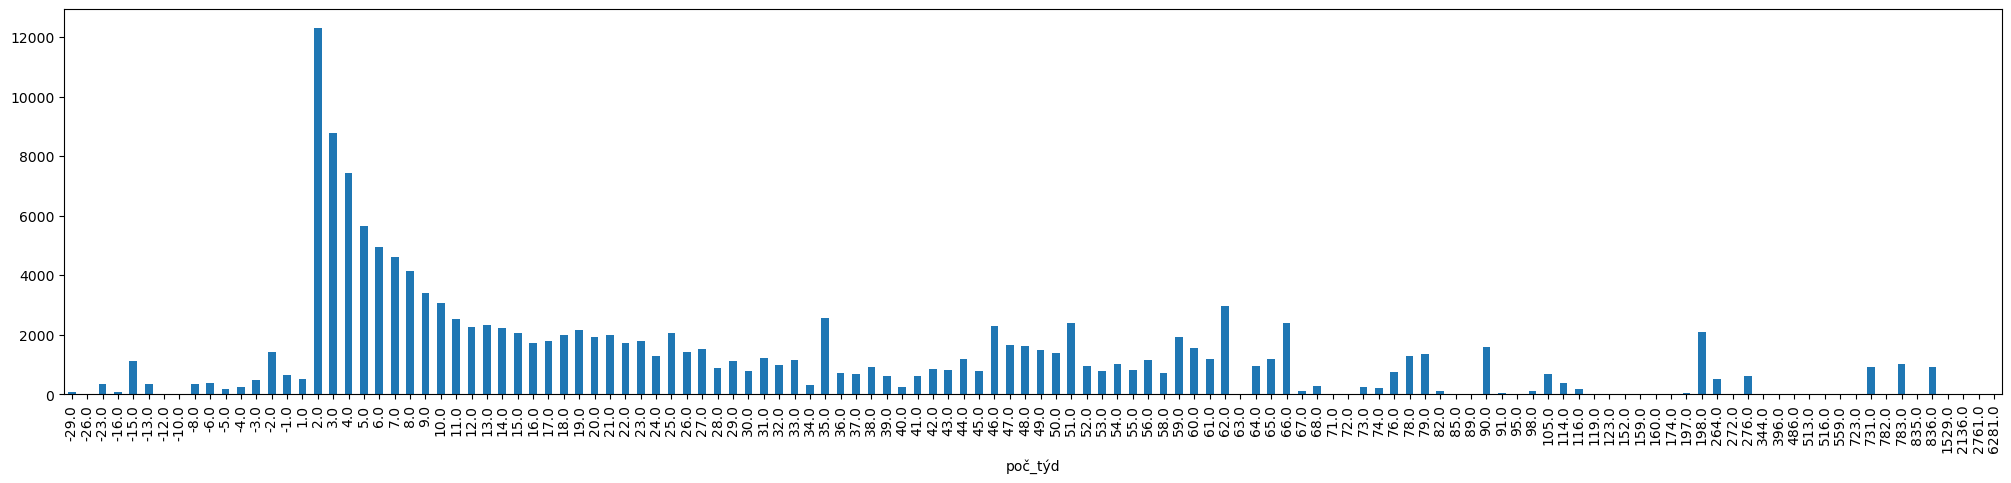

In [30]:
tydenni.groupby('poč_týd')['týden_diváci'].median().plot.bar(figsize=(25,5))

In [31]:
tydenni[tydenni['prod'] == 'SA']

,celkem_diváci,celkem_tržby,distributor,film,min_poř,poč_kin,poč_týd,poř,prod,rok,týden,týden_diváci,týden_tržby,víkend_diváci,víkend_tržby,změna_v_%,týden_od,víkend_od,datum,formát
309,4122.0,544262.0,Hollywood,Khumba,NaN,28.0,-1.0,10,SA,2014,20,NaN,NaN,4122.0,544262.0,NaN,2014-05-08,15.5.2014,NaN,NaN
325,7766.0,1021522.0,Hollywood,Khumba,10.0,103.0,1.0,6,SA,2014,21,4122.0,544262.0,3644.0,477260.0,-0.123106,2014-05-15,22.5.2014,NaN,NaN
348,13190.0,1685586.0,Hollywood,Khumba,6.0,81.0,2.0,9,SA,2014,22,4882.0,606340.0,4186.0,534984.0,0.093835,2014-05-22,29.05.2014,NaN,NaN
370,14492.0,1838979.0,Hollywood,Khumba,9.0,49.0,3.0,11,SA,2014,23,4844.0,612193.0,636.0,75144.0,-0.859697,2014-05-29,5.06.2014,NaN,NaN
391,16358.0,2050183.0,Hollywood,Khumba,11.0,48.0,4.0,12,SA,2014,24,841.0,95733.0,1661.0,190615.0,1.536663,2014-06-05,12.06.2014,NaN,NaN
414,17264.0,2158351.0,Hollywood,Khumba,12.0,18.0,5.0,15,SA,2014,25,2038.0,234304.0,529.0,64479.0,-0.684863,2014-06-12,19.06.2014,NaN,NaN
433,20085.0,2414087.0,Hollywood,Khumba,16.0,21.0,6.0,14,SA,2014,26,1631.0,148937.0,1719.0,171278.0,1.656338,2014-06-19,26.06.2014,NaN,NaN
458,20495.0,2461878.0,Hollywood,Khumba,14.0,15.0,7.0,19,SA,2014,27,1854.0,188876.0,275.0,30193.0,-0.823719,2014-06-26,3.07.2014,NaN,NaN
14613,2225.0,295206.0,Hollywood,Zambezia,NaN,13.0,-1.0,12,SA,2013,16,NaN,NaN,2225.0,295206.0,NaN,2013-04-11,18.4.2013,NaN,NaN
14623,11405.0,1507957.0,Hollywood,Zambezia,12.0,107.0,1.0,2,SA,2013,17,2225.0,295206.0,9180.0,1212751.0,3.108152,2013-04-18,25.4.2013,NaN,NaN


In [32]:
tydenni.groupby('prod')['týden_diváci'].max().nlargest(50)

prod
USA    486794.0
CZE    362158.0
NZ     299975.0
GBR    212937.0
JAP    147416.0
NLD     86575.0
GER     82796.0
DEU     66266.0
SVK     61717.0
AUS     57571.0
CHN     41580.0
FRA     39413.0
DNK     31483.0
BEL     28856.0
XX      28551.0
ESP     28529.0
CAN     20696.0
UKR     20447.0
KOR     19460.0
RUS     18789.0
NOR     18510.0
BRA     15588.0
IND     15146.0
SWE     14686.0
SA      13627.0
JPN     12706.0
MAY     12593.0
IRL     12261.0
ITA     11207.0
CHL     10512.0
MAU      9747.0
ISL      9594.0
CHE      8306.0
PER      7885.0
ARG      7653.0
FIN      7382.0
MYS      5716.0
AUT      5347.0
POL      4042.0
MEX      3702.0
ZAF      1747.0
BIH      1553.0
ISR      1302.0
CRO      1180.0
HUN      1036.0
ROU       814.0
SER       406.0
SGP       213.0
IRN        56.0
HKG         NaN
Name: týden_diváci, dtype: float64

In [33]:
tydenni[tydenni['film'].str.lower().str.contains('v hlavě',na=False)]['film'].drop_duplicates()

1466        V hlavě
10824    V hlavě 2 
Name: film, dtype: object

In [34]:
tydenni[tydenni['poč_týd'] == 4].groupby('film')['celkem_diváci'].max().nlargest(50)

film
Avatar: The Way of Water                       957118.0
Avengers: Endgame                              853077.0
Ženy v běhu                                    722903.0
Anděl Páně 2                                   710622.0
V hlavě 2                                      604985.0
Harry Potter a relikvie smrti - 2.část         591762.0
Hobit: Bitva pěti armád                        590796.0
Ledové království II                           569176.0
Avengers: Infinity War                         557168.0
Harry Potter a relikvie smrti - 1.část         555643.0
Mimoni                                         555573.0
Avatar                                         554857.0
Star Wars: Síla se probouzí                    542563.0
Barbie                                         533330.0
Hobit: Šmakova dračí poušť                     527585.0
Bohemian Rhapsody                              525651.0
Hobit: Neočekávaná cesta                       519419.0
ONEMANSHOW - The Movie                     

In [35]:
tydenni[tydenni['prod'] == 'CZE'].groupby('film')['týden_diváci'].max().nlargest(50)

film
ONEMANSHOW - The Movie                           362158.0
Ženy v běhu                                      243982.0
Vyšehrad: Fylm                                   234368.0
Anděl Páně 2                                     229745.0
Babovřesky                                       197925.0
Muži v naději                                    190679.0
Kajínek                                          190452.0
Poslední aristokratka                            182272.0
V síti                                           179329.0
Tři bratři\r\n                                   178232.0
Po strništi bos                                  170944.0
Román pro muže                                   164125.0
Zápisník alkoholičky                             160744.0
Okresní přebor - Poslední zápas Pepika Hnátka    152062.0
Prvok, Šampón, Tečka a Karel                     151384.0
Zátopek                                          149807.0
Ženy v pokušení                                  148693.0
Lída Baar

In [36]:
tydenni[tydenni['film'] == 'Vlny']

,celkem_diváci,celkem_tržby,distributor,film,min_poř,poč_kin,poč_týd,poř,prod,rok,týden,týden_diváci,týden_tržby,víkend_diváci,víkend_tržby,změna_v_%,týden_od,víkend_od,datum,formát
10841,877.0,147754.0,BONTONFILM a.s.,Vlny,NaN,3.0,-5.0,20,CZE,2024,28,345.0,58217.0,532.0,89537.0,NaN,2024-07-04,11.07.2024,NaN,2D
10911,1969.0,362154.0,BONTONFILM a.s.,Vlny,36.0,7.0,-2.0,10,CZE,2024,31,130.0,19500.0,887.0,177275.0,8.0910,2024-07-25,01.08.2024,NaN,"2D, MP4"
10933,4838.0,599879.0,BONTONFILM a.s.,Vlny,10.0,2.0,-1.0,12,CZE,2024,32,2657.0,207250.0,1099.0,207750.0,0.1719,2024-08-01,08.08.2024,NaN,2D
10942,91897.0,14846700.0,BONTONFILM a.s.,Vlny,13.0,265.0,1.0,1,CZE,2024,33,15557.0,1837024.0,71213.0,12460907.0,58.9802,2024-08-08,15.08.2024,NaN,"2D, MP4"
10962,200925.0,34710476.0,BONTONFILM a.s.,Vlny,1.0,193.0,2.0,1,CZE,2024,34,114133.0,20161829.0,66108.0,12162854.0,-0.0240,2024-08-15,22.08.2024,NaN,"2D, MP4"
10982,292124.0,50769457.0,BONTONFILM a.s.,Vlny,1.0,171.0,3.0,1,CZE,2024,35,107004.0,19302652.0,50303.0,8919183.0,-0.2667,2024-08-22,29.08.2024,NaN,"2D, MP4"
11002,356730.0,61808071.5,BONTONFILM a.s.,Vlny,1.0,156.0,4.0,1,CZE,2024,36,75956.0,13136126.0,35186.0,6313876.5,-0.3157,2024-08-29,05.09.2024,NaN,"2D, MP4"
11022,446744.0,78527810.0,BONTONFILM a.s.,Vlny,1.0,166.0,5.0,1,CZE,2024,37,58840.0,10391534.5,66360.0,12642080.5,1.0022,2024-09-05,12.09.2024,NaN,"2D, MP4"
11042,502095.0,87882914.5,BONTONFILM a.s.,Vlny,1.0,157.0,6.0,1,CZE,2024,38,88330.0,16070763.5,33381.0,5926421.5,-0.5313,2024-09-12,19.09.2024,NaN,"2D, MP4"


In [37]:
df = pd.read_csv("data/souhrnne_vysledky.csv")

In [38]:
df

,rok,mesic,predstaveni,divactvo,ciste_trzby,prumerne_vstupne
0,2000,1,16184.0,688131.0,45494892.0,66.113708
1,2000,2,15774.0,888290.0,60084053.0,67.640132
2,2000,3,17508.0,946705.0,61743112.0,65.218956
3,2000,4,16755.0,742518.0,46847625.0,63.092915
4,2000,5,16154.0,646617.0,43016124.0,66.524889
...,...,...,...,...,...,...
295,2024,8,48730.0,1756385.0,310263777.0,176.649070
296,2024,9,NaN,NaN,NaN,NaN
297,2024,10,NaN,NaN,NaN,NaN
298,2024,11,NaN,NaN,NaN,NaN


<Axes: xlabel='rok'>

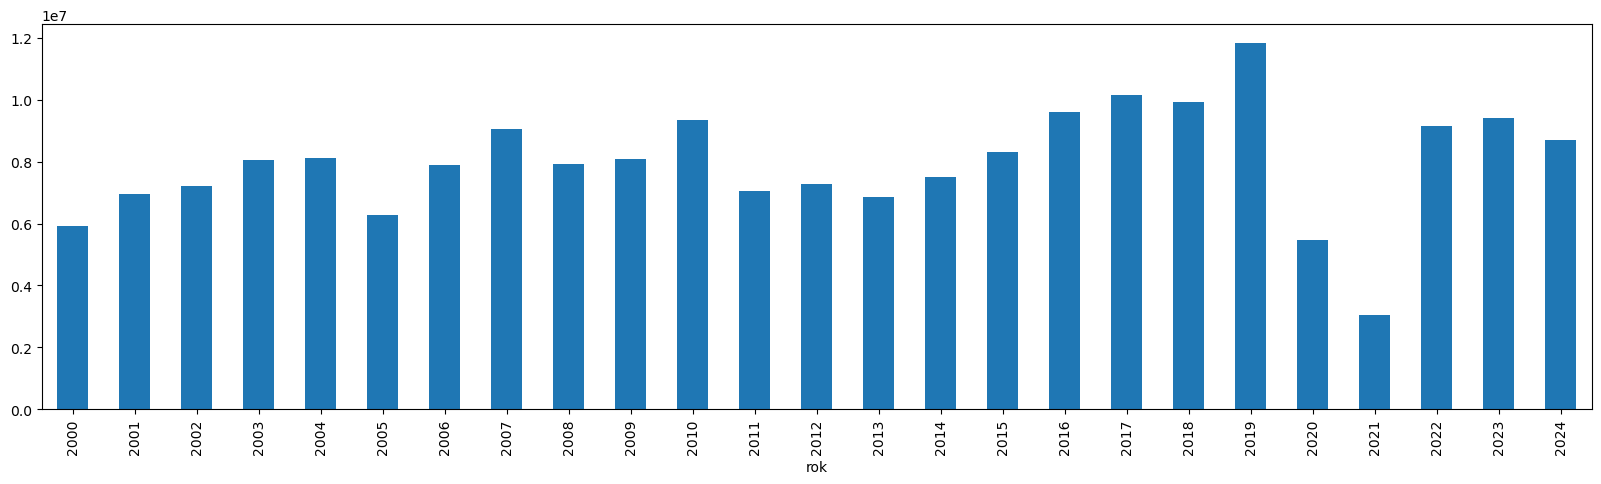

In [121]:
df[df['mesic'] <= 8].groupby('rok')['divactvo'].sum().plot.bar(figsize=(20,5))

<Axes: xlabel='rok'>

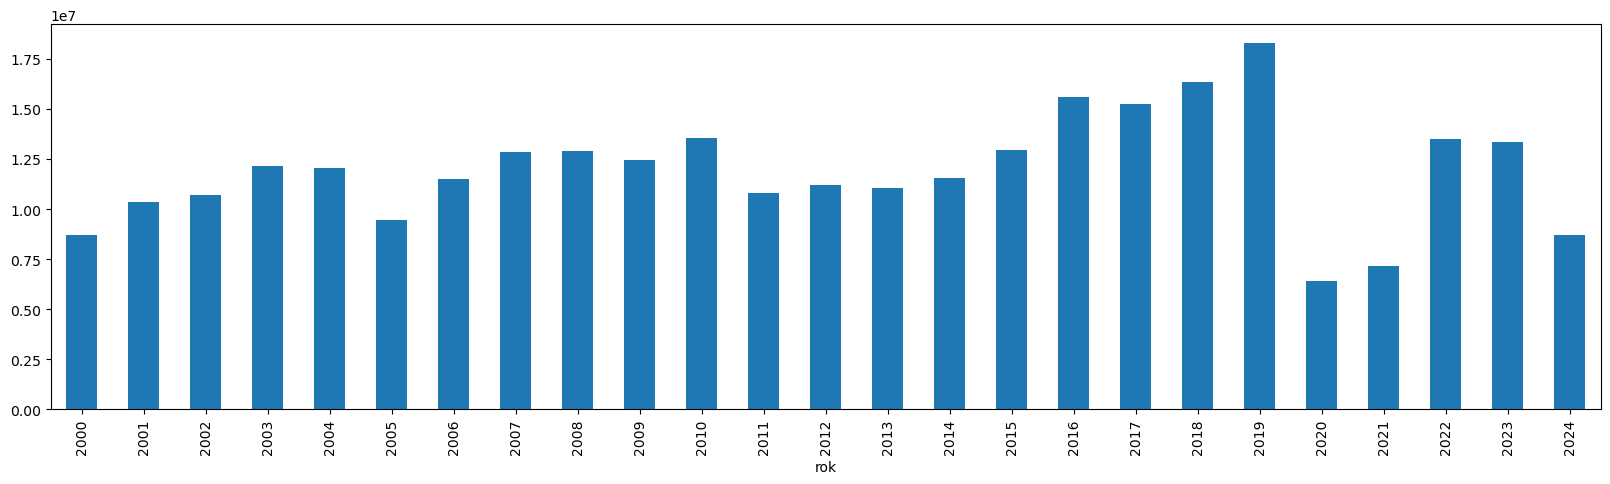

In [39]:
df.groupby('rok')['divactvo'].sum().plot.bar(figsize=(20,5))

<Axes: xlabel='rok'>

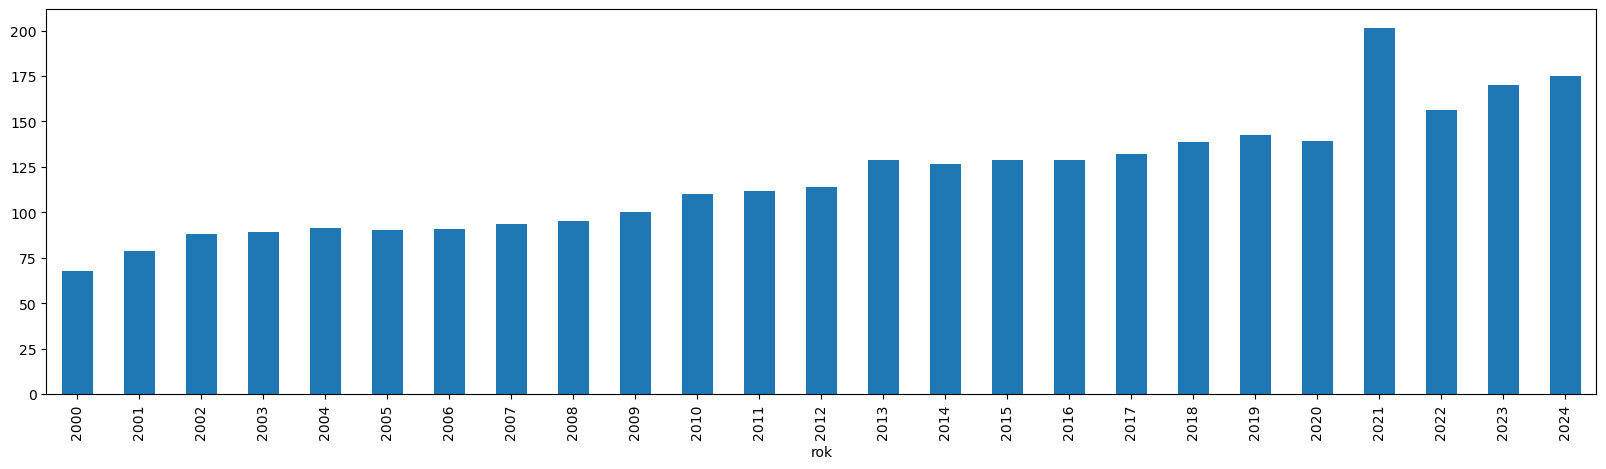

In [40]:
df.groupby('rok')['prumerne_vstupne'].mean().plot.bar(figsize=(20,5))

<Axes: xlabel='rok'>

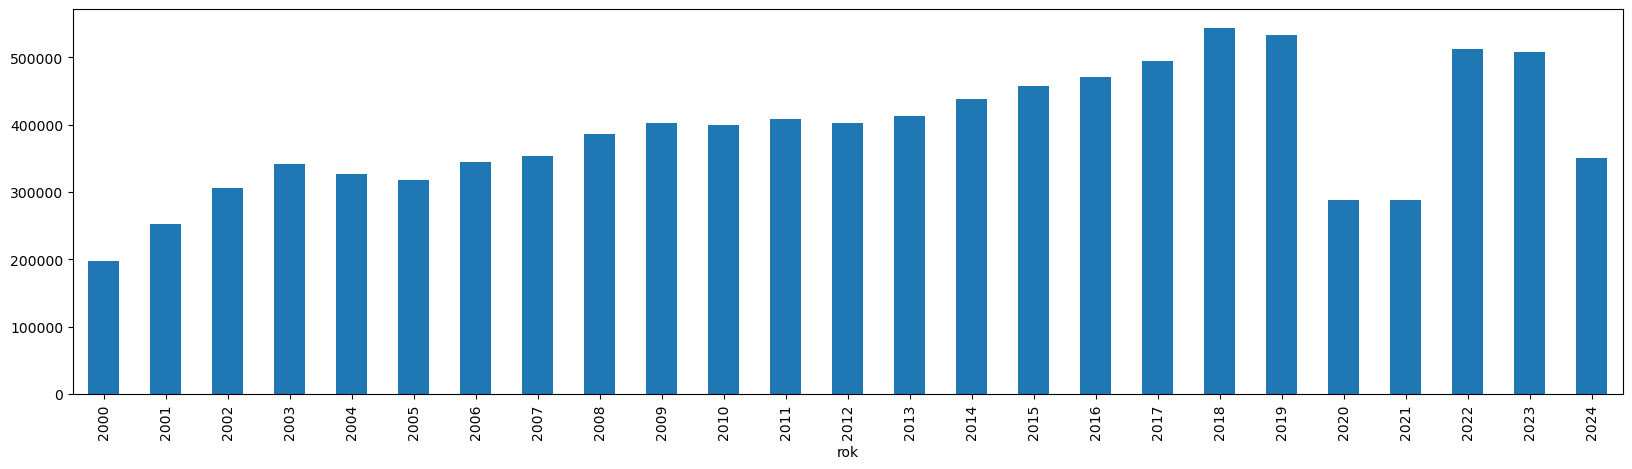

In [41]:
df.groupby('rok')['predstaveni'].sum().plot.bar(figsize=(20,5))

In [42]:
(df.groupby('rok')['divactvo'].sum() / df.groupby('rok')['predstaveni'].sum())

rok
2000    44.121797
2001    41.011730
2002    34.935070
2003    35.565485
2004    36.878269
2005    29.787161
2006    33.336225
2007    36.261947
2008    33.384447
2009    30.926158
2010    33.918574
2011    26.396321
2012    27.802133
2013    26.757489
2014    26.365087
2015    28.334428
2016    33.153346
2017    30.843150
2018    30.031591
2019    34.314479
2020    22.154437
2021    24.762431
2022    26.322794
2023    26.244970
2024    24.886108
dtype: float64

<Axes: xlabel='rok'>

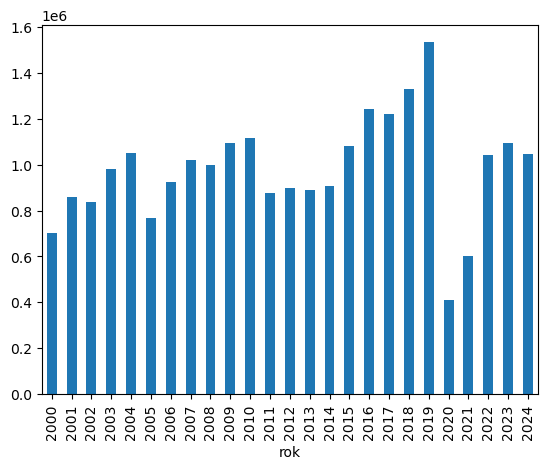

In [43]:
df.groupby('rok')['divactvo'].median().plot.bar()

<Axes: xlabel='rok'>

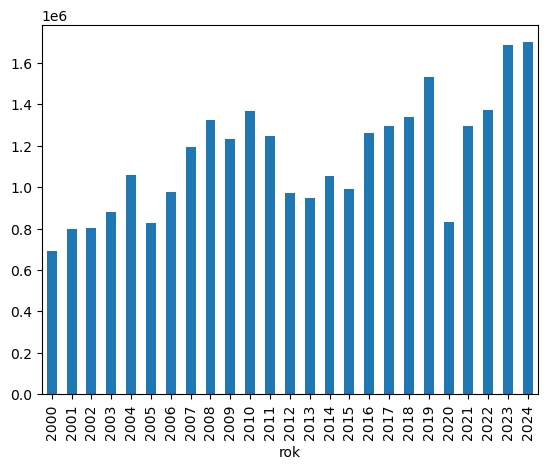

In [44]:
df[df['mesic'].isin([7,8])].groupby('rok')['divactvo'].median().plot.bar()

<Axes: xlabel='mesic'>

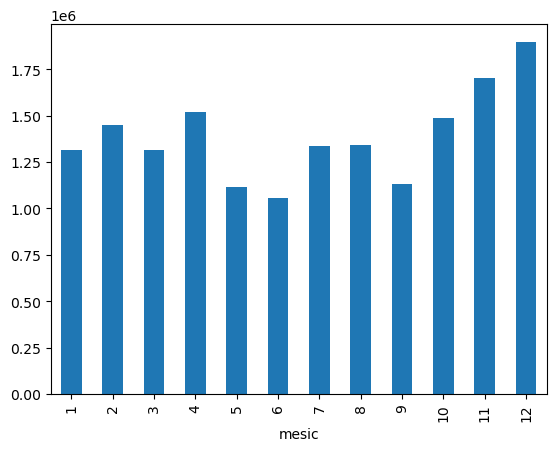

In [45]:
df[df['rok'].isin([2017,2018,2019])].groupby('mesic')['divactvo'].median().plot.bar()

<Axes: xlabel='mesic'>

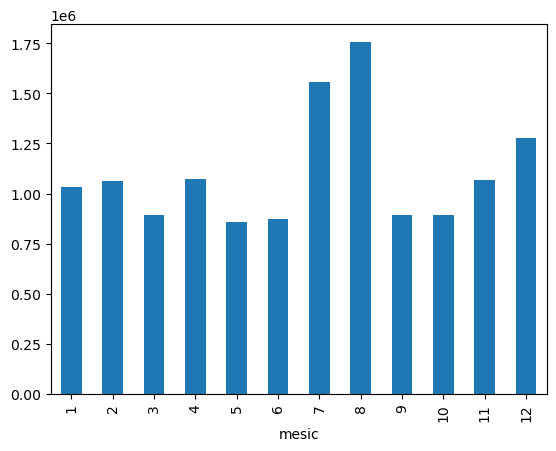

In [46]:
df[df['rok'].isin([2022,2023,2024])].groupby('mesic')['divactvo'].median().plot.bar()

<Axes: xlabel='rok'>

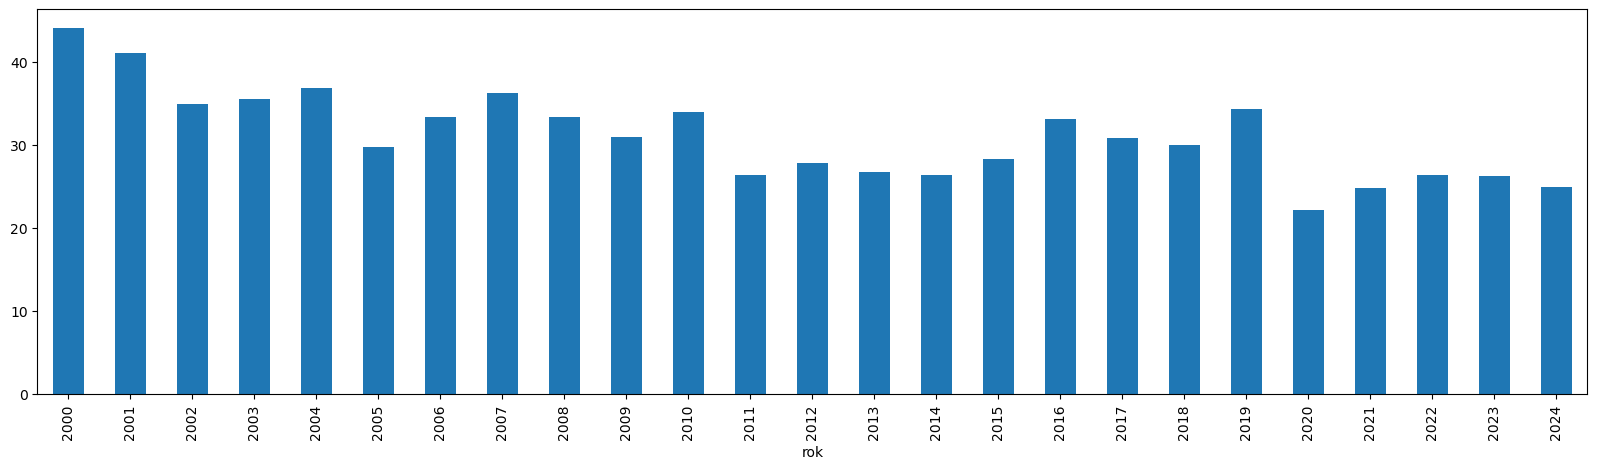

In [47]:
(df.groupby('rok')['divactvo'].sum() / df.groupby('rok')['predstaveni'].sum()).plot.bar(figsize=(20,5))

<Axes: xlabel='rok'>

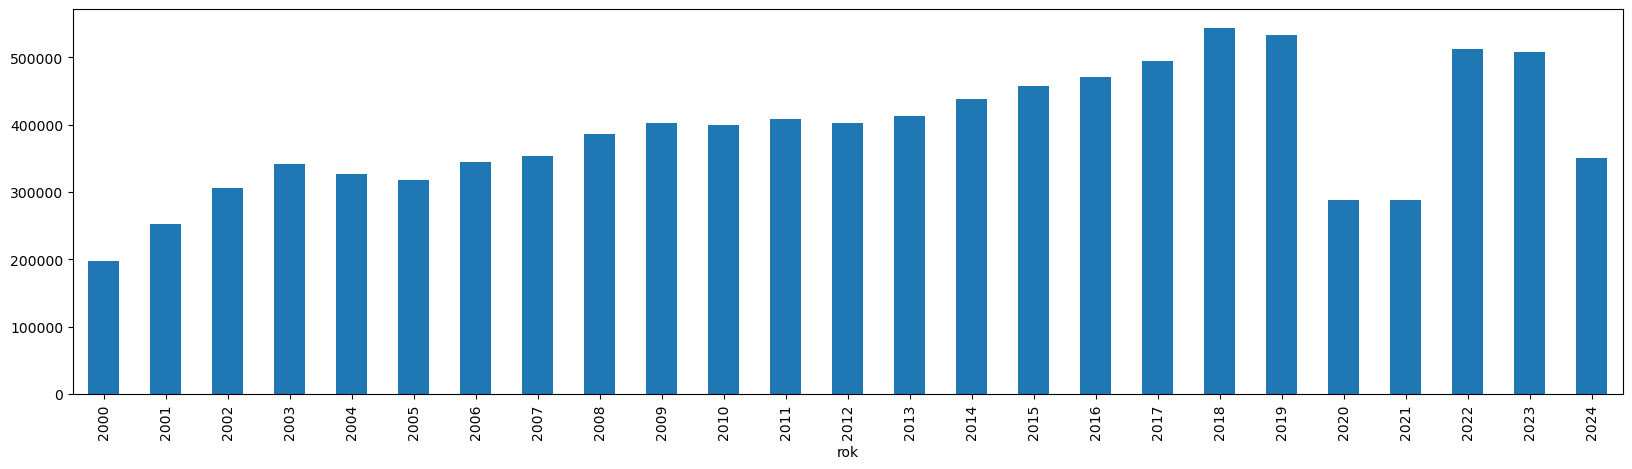

In [48]:
df.groupby('rok')['predstaveni'].sum().plot.bar(figsize=(20,5))

In [49]:
df.tail(20)

,rok,mesic,predstaveni,divactvo,ciste_trzby,prumerne_vstupne
280,2023,5,41593.0,859181.0,151102780.0,175.868391
281,2023,6,41251.0,871043.0,135276058.0,155.303536
282,2023,7,46359.0,1488158.0,254436662.0,170.974226
283,2023,8,43667.0,1887930.0,328685071.0,174.098124
284,2023,9,43129.0,822718.0,139009416.0,168.963625
285,2023,10,43085.0,862556.0,147142145.0,170.588513
286,2023,11,41913.0,1117244.0,200958963.0,179.870255
287,2023,12,44665.0,1132465.0,181329317.0,160.119136
288,2024,1,42403.0,1033398.0,183229261.0,177.307544
289,2024,2,43306.0,1063179.0,181746495.0,170.946280


In [50]:
df.groupby('rok')['divactvo'].sum() / df.groupby('rok')['predstaveni'].sum()

rok
2000    44.121797
2001    41.011730
2002    34.935070
2003    35.565485
2004    36.878269
2005    29.787161
2006    33.336225
2007    36.261947
2008    33.384447
2009    30.926158
2010    33.918574
2011    26.396321
2012    27.802133
2013    26.757489
2014    26.365087
2015    28.334428
2016    33.153346
2017    30.843150
2018    30.031591
2019    34.314479
2020    22.154437
2021    24.762431
2022    26.322794
2023    26.244970
2024    24.886108
dtype: float64

In [51]:
df[df['mesic'].isin([1,2,3,4,5])].groupby('rok')['divactvo'].sum()

rok
2000    3912261.0
2001    4332476.0
2002    4811513.0
2003    5434012.0
2004    4944323.0
2005    3855961.0
2006    5085336.0
2007    5425394.0
2008    4451054.0
2009    4670302.0
2010    5682687.0
2011    3582001.0
2012    4233521.0
2013    4147025.0
2014    4504243.0
2015    5222752.0
2016    5934656.0
2017    6444338.0
2018    6185981.0
2019    7869230.0
2020    3517708.0
2021      18877.0
2022    5283053.0
2023    5154871.0
2024    4627013.0
Name: divactvo, dtype: float64

<Axes: xlabel='rok'>

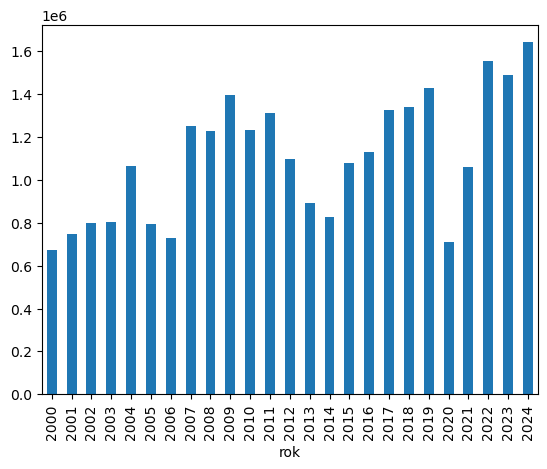

In [52]:
df[df['mesic'].isin([7])].groupby('rok')['divactvo'].sum().plot.bar()

<Axes: xlabel='rok'>

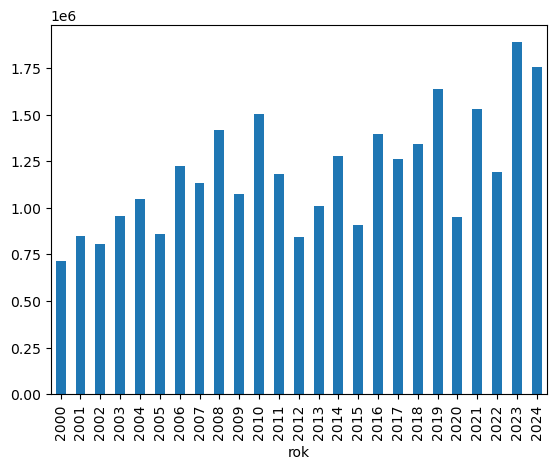

In [53]:
df[df['mesic'].isin([8])].groupby('rok')['divactvo'].sum().plot.bar()

In [54]:
filmy = pd.read_csv('data/filmy.csv')

In [55]:
filmy.columns

Index(['poř.', 'titul', 'titul orig.', 'distributor', 'formát', 'premiéra',
       'produkce', 'předst.', 'diváci', 'tržby', 'předst._celkem',
       'diváci_celkem', 'tržby_celkem', 'rok', 'předst', 'předst_celkem',
       'číslo', 'úprava', 'kopií', 'čisté tržby', 'pořadí', 'český název',
       'orig. název', 'země', 'diváků', 'čistá tržba', 'titul cz',
       'titul orig', 'prod'],
      dtype='object')

In [56]:
filmy['premiéra'].max()

'2023-12-21 00:00:00'

In [57]:
filmy[filmy['titul'].str.lower().str.contains('vlny',na=False)]

,poř.,titul,titul orig.,distributor,formát,premiéra,produkce,předst.,diváci,tržby,...,čisté tržby,pořadí,český název,orig. název,země,diváků,čistá tržba,titul cz,titul orig,prod
456,7.0,Něžné vlny,Něžné vlny,Falcon,NaN,2014-01-09 00:00:00,CZ,NaN,232717.0,30104929.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,NaN,Divoké vlny,Surf's Up,Falcon,NaN,2007-08-09 00:00:00,NaN,4104.0,139501.0,11867715.0,...,NaN,21.0,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN


In [58]:
filmy.groupby('titul')['diváci'].max().nlargest(50)

titul
Ženy v běhu                               1543842.0
Vratné lahve                              1254282.0
Ženy v pokušení                           1232299.0
Tmavomodrý svět                           1128990.0
Bohemian Rhapsody                         1073638.0
Titanic                                   1050371.0
Pupendo                                    958327.0
Pán prstenů: Společenstvo prstenu          957223.0
Avatar                                     954108.0
Avengers: Endgame                          935915.0
Pelíšky                                    914442.0
Anděl Páně 2                               913767.0
Líbáš jako bůh                             904589.0
Muži v naději                              852199.0
Doba ledová 3: Úsvit dinosaurů 3D          852067.0
Obsluhoval jsem anglického krále           849078.0
Mimoni                                     830984.0
Top Gun: Maverick                          809977.0
Kajínek                                    790792.0
Účastn

In [59]:
filmy.groupby('titul')['diváci_celkem'].max().nlargest(10)

titul
Bohemian Rhapsody           1831714.0
Ženy v běhu                 1543842.0
Avatar: The Way of Water    1469757.0
Avatar                      1329841.0
Anděl Páně 2                1279143.0
Ženy v pokušení             1232299.0
Avengers: Endgame            935915.0
Ledové království II         906187.0
Mimoni                       830984.0
Top Gun: Maverick            809977.0
Name: diváci_celkem, dtype: float64

In [60]:
filmy.groupby('rok')['diváci'].max() / df.groupby('rok')['divactvo'].sum()

rok
1998         NaN
1999         NaN
2000    0.055136
2001    0.108941
2002    0.089519
2003    0.078942
2004    0.064656
2005    0.058096
2006    0.068479
2007    0.097765
2008         NaN
2009    0.072545
2010    0.091033
2011    0.078982
2012    0.059989
2013    0.059006
2014    0.057220
2015    0.064129
2016    0.058493
2017    0.040101
2018    0.065688
2019    0.084273
2020    0.064722
2021    0.084042
2022    0.060017
2023    0.054166
2024         NaN
dtype: float64

In [61]:
filmy.groupby('rok').first()

,poř.,titul,titul orig.,distributor,formát,premiéra,produkce,předst.,diváci,tržby,...,čisté tržby,pořadí,český název,orig. název,země,diváků,čistá tržba,titul cz,titul orig,prod
rok,,,,,,,,,,,,,,,,,,,,,
1998,1.0,Titanic,None,Bontonfilm,None,1998-02-05 00:00:00,None,NaN,1050371.0,7.904986e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,Titanic,US
1999,1.0,Pelíšky,None,Space Films,None,1999-04-08 00:00:00,None,NaN,914442.0,5.507810e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,Pelíšky,CZ
2000,1.0,None,None,Bontonfilm,None,2000-02-03 00:00:00,None,NaN,480719.0,2.393303e+07,...,NaN,NaN,None,None,None,NaN,NaN,Princezna ze mlejna II.,Princezna ze mlejna II.,CZ
2001,1.0,Tmavomodrý svět,None,Cinemart,None,2001-05-17 00:00:00,None,NaN,1128990.0,8.567315e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,Tmavomodrý svět,CZ
2002,1.0,Pán prstenů: Společenstvo prstenu,None,Warner Bros,None,2002-01-10 00:00:00,None,NaN,957223.0,8.898845e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,Lord of the Rings 1,US
2003,1.0,Pupendo,None,Falcon,None,2003-03-27 00:00:00,None,NaN,958327.0,8.660440e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,Pupendo,CZ
2004,1.0,Pán prstenů: Návrat krále,None,Warner Bros,None,2004-01-15 00:00:00,None,NaN,778852.0,8.004145e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,"Lord of the Rings:The Return of the King, the",US
2005,1.0,None,Roman pro zeny,Bioscop,None,2005-04-14 00:00:00,None,11600.0,550670.0,5.203858e+07,...,NaN,NaN,None,None,CZ,NaN,NaN,Román pro ženy,None,None
2006,1.0,Účastníci zájezdu,Účastníci zájezdu,Falcon,None,2006-04-20 00:00:00,CZ,NaN,788126.0,7.631337e+07,...,NaN,NaN,None,None,None,NaN,NaN,None,None,None
